---

------

# 🚧 🌆 **PROJECT KAYAK** Part 🅰 🌇 ⛵
##### **Doriane DOYON-DOUSSE** : *Certification bloc 1* ✅  (**ds_fs_od_03** 📖) 

*******

## 🔷 **PART A.** :   Selecting the **Best 5 cities** on those *35 given* by the marketing team in function of some **weather criterias** 

+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + 

#### A. <ins>**Importations** :</ins> 

In [1]:
import pandas as pd
import requests 
import json

#### B. <ins>*Requesting Nominatim OpenStreetMap API*</ins> : obtaining informations about the **location** of those **french cities**

Here are the 35 french cities given by the marketing team :

In [2]:
french_cities = ["Mont Saint Michel",
"St Malo",
"Bayeux",
"Le Havre",
"Rouen",
"Paris",
"Amiens",
"Lille",
"Strasbourg",
"Chateau du Haut Koenigsbourg",
"Colmar",
"Eguisheim",
"Besancon",
"Dijon",
"Annecy",
"Grenoble",
"Lyon",
"Gorges du Verdon",
"Bormes les Mimosas",
"Cassis",
"Marseille",
"Aix en Provence",
"Avignon",
"Uzes",
"Nimes",
"Aigues Mortes",
"Saintes Maries de la mer",
"Collioure",
"Carcassonne",
"Ariege",
"Toulouse",
"Montauban",
"Biarritz",
"Bayonne",
"La Rochelle"]

We can create a dataframe of those cities for better visualisation and maybe next in the project, it could be usefull 

In [3]:
df_french_cities = pd.DataFrame()

df_french_cities['Cities'] = french_cities

df_french_cities

,Cities
0,Mont Saint Michel
1,St Malo
2,Bayeux
3,Le Havre
4,Rouen
5,Paris
6,Amiens
7,Lille
8,Strasbourg
9,Chateau du Haut Koenigsbourg



We will use Nominatim API (https://nominatim.org/) to get the gps coordinates of all the cities 

First of all, let's try to get information about the best city in the world : the **Pink City** 💖💫

In [4]:
payloads_toulouse = {'country':'France', 'city':'Toulouse', 'format':'json'}
url = 'https://nominatim.openstreetmap.org/search?'

toulouse_request = requests.get(url, params = payloads_toulouse)
print('Request status :', '\n', toulouse_request, '\n')

tlse_content = toulouse_request.content
print('Here is the content of our request :', '\n', tlse_content, '\n')

tlse_json = toulouse_request.json()
print("For better interpretation, let's read the request as json file :", '\n', tlse_json)

Request status : 
 <Response [200]> 

Here is the content of our request : 
 b'[{"place_id":376688237,"licence":"Data \xc2\xa9 OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright","osm_type":"relation","osm_id":35738,"lat":"43.6044622","lon":"1.4442469","class":"boundary","type":"administrative","place_rank":16,"importance":0.6682142268493704,"addresstype":"city","name":"Toulouse","display_name":"Toulouse, Haute-Garonne, Occitanie, France m\xc3\xa9tropolitaine, France","boundingbox":["43.5326540","43.6687080","1.3503956","1.5153795"]},{"place_id":104974695,"licence":"Data \xc2\xa9 OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright","osm_type":"relation","osm_id":1649040,"lat":"43.579275100000004","lon":"1.5032717763608257","class":"boundary","type":"administrative","place_rank":14,"importance":0.3869603398828882,"addresstype":"municipality","name":"Toulouse","display_name":"Toulouse, Haute-Garonne, Occitanie, France m\xc3\xa9tropolitaine, France","boundingbox":["

In [5]:
tlse_json

[{'place_id': 376688237,
  'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright',
  'osm_type': 'relation',
  'osm_id': 35738,
  'lat': '43.6044622',
  'lon': '1.4442469',
  'class': 'boundary',
  'type': 'administrative',
  'place_rank': 16,
  'importance': 0.6682142268493704,
  'addresstype': 'city',
  'name': 'Toulouse',
  'display_name': 'Toulouse, Haute-Garonne, Occitanie, France métropolitaine, France',
  'boundingbox': ['43.5326540', '43.6687080', '1.3503956', '1.5153795']},
 {'place_id': 104974695,
  'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright',
  'osm_type': 'relation',
  'osm_id': 1649040,
  'lat': '43.579275100000004',
  'lon': '1.5032717763608257',
  'class': 'boundary',
  'type': 'administrative',
  'place_rank': 14,
  'importance': 0.3869603398828882,
  'addresstype': 'municipality',
  'name': 'Toulouse',
  'display_name': 'Toulouse, Haute-Garonne, Occitanie, France métropolitaine, France',
  'boundingbox'

We will put it into a **pandas dataframe** named *df_toulouse* to have a more clearer understanding : 

In [6]:
df_toulouse = pd.DataFrame.from_dict(tlse_json)
df_toulouse

,place_id,licence,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name,boundingbox
0,376688237,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,35738,43.6044622,1.4442469,boundary,administrative,16,0.668214,city,Toulouse,"Toulouse, Haute-Garonne, Occitanie, France mét...","[43.5326540, 43.6687080, 1.3503956, 1.5153795]"
1,104974695,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,1649040,43.579275100000004,1.5032717763608257,boundary,administrative,14,0.386960,municipality,Toulouse,"Toulouse, Haute-Garonne, Occitanie, France mét...","[43.2369002, 43.9216357, 0.9523375, 2.0482851]"


To obtain a GPS (global Positionning System) location of a city thanks to satellites signals, we need two informations :
- The **latitude** 
- The **longitud**

We will use the **address type 'city'** and not 'municipality' for the GPS coordonates 

In [7]:
print('Toulouse latitude :', df_toulouse['lat'], '\n') 
print('Toulouse latitude :', df_toulouse['lon'])
print()
print()
# Let's put it into a dataframe instead of a Series, it will look nicer :)
df_tlse_coord = df_toulouse.iloc[0, 4:6]
df_tlse_coord.to_frame(name="Toulouse Location")

Toulouse latitude : 0            43.6044622
1    43.579275100000004
Name: lat, dtype: object 

Toulouse latitude : 0             1.4442469
1    1.5032717763608257
Name: lon, dtype: object




,Toulouse Location
lat,43.6044622
lon,1.4442469


### ➡️  Good, now **let's loop for all french cities** :

In [8]:
gps_info = [] # let's create an empty list where will put all locations info 


for ville in french_cities:

    url = 'https://nominatim.openstreetmap.org/search?'
    payloads_all_cities = {'country':'France', 'city':ville, 'format':'json'}

    all_cities_requests = requests.get(url, params=payloads_all_cities)

    if len(all_cities_requests.json()) > 0:
        lat = all_cities_requests.json()[0]['lat']
        lon = all_cities_requests.json()[0]['lon']
        id = all_cities_requests.json()[0]['place_id']
        locations = {"City":ville, "Latitude":lat, "Longitude":lon, "id":id}
        gps_info.append(locations)
        print(locations)

{'City': 'Mont Saint Michel', 'Latitude': '48.6359541', 'Longitude': '-1.511459954959514', 'id': 276970680}
{'City': 'St Malo', 'Latitude': '48.649518', 'Longitude': '-2.0260409', 'id': 277106181}
{'City': 'Bayeux', 'Latitude': '49.2764624', 'Longitude': '-0.7024738', 'id': 276101915}
{'City': 'Le Havre', 'Latitude': '49.4938975', 'Longitude': '0.1079732', 'id': 116797886}
{'City': 'Rouen', 'Latitude': '49.4404591', 'Longitude': '1.0939658', 'id': 116490697}
{'City': 'Paris', 'Latitude': '48.8534951', 'Longitude': '2.3483915', 'id': 114827617}
{'City': 'Amiens', 'Latitude': '49.8941708', 'Longitude': '2.2956951', 'id': 116694242}
{'City': 'Lille', 'Latitude': '50.6365654', 'Longitude': '3.0635282', 'id': 118533424}
{'City': 'Strasbourg', 'Latitude': '48.584614', 'Longitude': '7.7507127', 'id': 136466809}
{'City': 'Chateau du Haut Koenigsbourg', 'Latitude': '48.2495226', 'Longitude': '7.3454923', 'id': 136411398}
{'City': 'Colmar', 'Latitude': '48.0777517', 'Longitude': '7.3579641', 'id

Here is the list name **gps_info** where we putted all the coordonates informations :

In [9]:
gps_info

[{'City': 'Mont Saint Michel',
  'Latitude': '48.6359541',
  'Longitude': '-1.511459954959514',
  'id': 276970680},
 {'City': 'St Malo',
  'Latitude': '48.649518',
  'Longitude': '-2.0260409',
  'id': 277106181},
 {'City': 'Bayeux',
  'Latitude': '49.2764624',
  'Longitude': '-0.7024738',
  'id': 276101915},
 {'City': 'Le Havre',
  'Latitude': '49.4938975',
  'Longitude': '0.1079732',
  'id': 116797886},
 {'City': 'Rouen',
  'Latitude': '49.4404591',
  'Longitude': '1.0939658',
  'id': 116490697},
 {'City': 'Paris',
  'Latitude': '48.8534951',
  'Longitude': '2.3483915',
  'id': 114827617},
 {'City': 'Amiens',
  'Latitude': '49.8941708',
  'Longitude': '2.2956951',
  'id': 116694242},
 {'City': 'Lille',
  'Latitude': '50.6365654',
  'Longitude': '3.0635282',
  'id': 118533424},
 {'City': 'Strasbourg',
  'Latitude': '48.584614',
  'Longitude': '7.7507127',
  'id': 136466809},
 {'City': 'Chateau du Haut Koenigsbourg',
  'Latitude': '48.2495226',
  'Longitude': '7.3454923',
  'id': 136411

For better visualisation, let's *put it into a Dataframe* : 

In [10]:
# Putting into a dataframe gps_info
df_gps_info = pd.DataFrame(gps_info)
display(df_gps_info)

# keeping in a variable id from cities 
id_city_locator = 'id'

,City,Latitude,Longitude,id
0,Mont Saint Michel,48.6359541,-1.511459954959514,276970680
1,St Malo,48.649518,-2.0260409,277106181
2,Bayeux,49.2764624,-0.7024738,276101915
3,Le Havre,49.4938975,0.1079732,116797886
4,Rouen,49.4404591,1.0939658,116490697
5,Paris,48.8534951,2.3483915,114827617
6,Amiens,49.8941708,2.2956951,116694242
7,Lille,50.6365654,3.0635282,118533424
8,Strasbourg,48.584614,7.7507127,136466809
9,Chateau du Haut Koenigsbourg,48.2495226,7.3454923,136411398


Well okay, seems like everything went good :)

******

# 🌞🌝 **Weather informations** 🌚⛅

******


#### Let's put ourselves in **real life condition.** 👵 👴 

Imagine we want to offer a weekend for our grand parents '50 years of marriage, but poor grandma, even if she remains active an dynamic, she strives with **Arthristis** which can be very hard to manage when the weather is against her : humidity and high atmospheric pressure could trigger pain and ruin our gift (and make grandpa angry by the way). 
Let's use our coding skills to help them by founding an adapted weather for their trip : 😌

° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° °

We will find those informations on the **Open Weather API** : https://openweathermap.org/api

API key : 44cf26307d0e5da24065edb4b7f26019

° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° °

## A. <ins>Get current weather informations</ins> 📋

#### Now, let's do that again with **selected weather criterias** in order to put it into a Dataframe
- Here the Guide from Open Weather Map about current weather : https://openweathermap.org/current

### ➡️ <ins>Current weather from **Toulouse** :</ins>

In [11]:
# API key given by Open Weather // City we want to obtain infos about
API_key = '44cf26307d0e5da24065edb4b7f26019'
city = "Toulouse"


# Extraction of Longitude and Latitude from gps_info // Requesting Open Weather to get Toulouse climate informations
latitude, longitude = [(weath_descr['Latitude'], weath_descr['Longitude']) for weath_descr in gps_info if weath_descr['City'] == city][0]
API_REQUEST = requests.get(f"https://api.openweathermap.org/data/2.5/weather?lat={latitude}&lon={longitude}&appid={API_key}&units=metric")

# Selecting which weather criterias wer want to get
if API_REQUEST.status_code == 200:
    API_REQUEST_json = API_REQUEST.json()
    print()
    print('Structure of the json obtained from the previous request :')
    display(API_REQUEST_json)
    print()
    weather_descr = {
                     "City":city,
                     "Latitude":latitude, 
                     'Longitude':longitude, 
                     "Main_weather": API_REQUEST_json["weather"][0]["description"],
                     "Min_temp": API_REQUEST_json["main"]['temp_min'],
                     "Max_temp": API_REQUEST_json["main"]['temp_max'],
                     "Feels_like": API_REQUEST_json["main"]["feels_like"],
                     "Wind": API_REQUEST_json["wind"]["speed"],
                     "Pressure": API_REQUEST_json["main"]['pressure'],
                     "Humidity": API_REQUEST_json["main"]["humidity"]}


# Put it into a Dataframe and print both original results and df 
df_weather_descr = pd.DataFrame.from_dict(weather_descr, orient='index')
print(f'Here is the Weather Description from the city of {city} :')
print(weather_descr)
print()
print('Dataframe from results :')
df_weather_descr_T = df_weather_descr.transpose()
df_weather_descr_T



Structure of the json obtained from the previous request :


{'coord': {'lon': 1.4442, 'lat': 43.6045},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 12.99,
  'feels_like': 12.09,
  'temp_min': 12.97,
  'temp_max': 14.29,
  'pressure': 1009,
  'humidity': 67},
 'visibility': 10000,
 'wind': {'speed': 3.6, 'deg': 140},
 'clouds': {'all': 0},
 'dt': 1704383459,
 'sys': {'type': 1,
  'id': 6467,
  'country': 'FR',
  'sunrise': 1704353255,
  'sunset': 1704385787},
 'timezone': 3600,
 'id': 2972315,
 'name': 'Toulouse',
 'cod': 200}


Here is the Weather Description from the city of Toulouse :
{'City': 'Toulouse', 'Latitude': '43.6044622', 'Longitude': '1.4442469', 'Main_weather': 'clear sky', 'Min_temp': 12.97, 'Max_temp': 14.29, 'Feels_like': 12.09, 'Wind': 3.6, 'Pressure': 1009, 'Humidity': 67}

Dataframe from results :


,City,Latitude,Longitude,Main_weather,Min_temp,Max_temp,Feels_like,Wind,Pressure,Humidity
0,Toulouse,43.6044622,1.4442469,clear sky,12.97,14.29,12.09,3.6,1009,67


### ➡️ <ins>Let's loop over **all cities** :</ins>

In [12]:
# GETTING THE CURRENT WEATHER FROM FRECH CITIES
#----------------------------------------------

API_key = '44cf26307d0e5da24065edb4b7f26019' # key to access the API
list_weather = [] # creating an empty list 


# looping for all french cities (first list created)
for ville in french_cities:
        latitude, longitude = [(all_weather_descr['Latitude'], all_weather_descr['Longitude']) for all_weather_descr in gps_info if all_weather_descr['City'] == ville][0] # goal here is to obtain gps coordinates (latitude and longitude)
        ALLWEATHER_API_REQUEST =  requests.get(f"https://api.openweathermap.org/data/2.5/weather?lat={latitude}&lon={longitude}&APPID={API_key}&units=metric") # requesting Open Weather Map 
        if ALLWEATHER_API_REQUEST.status_code == 200:  # condition to get infos (having response positive from api)
                ALLWEATHER_API_REQUEST_json = ALLWEATHER_API_REQUEST.json() # convert into json file 
                # Selecting weather criterions of interest and put it in a dictionnary 
                all_weather_descr = {
                        'id': ALLWEATHER_API_REQUEST_json[id_city_locator],
                        "City":ville,
                        "Latitude":latitude, 
                        'Longitude':longitude, 
                        "Main_weather": ALLWEATHER_API_REQUEST_json["weather"][0]["description"],
                        "Temperature": ALLWEATHER_API_REQUEST_json["main"]['temp'],
                        "Max_temp": ALLWEATHER_API_REQUEST_json["main"]['temp_max'],
                        "Min_temp": ALLWEATHER_API_REQUEST_json["main"]['temp_min'],
                        "Feels_like": ALLWEATHER_API_REQUEST_json["main"]["feels_like"],
                        "Wind": ALLWEATHER_API_REQUEST_json["wind"]["speed"],
                        "Pressure": ALLWEATHER_API_REQUEST_json["main"]['pressure'],
                        "Humidity": ALLWEATHER_API_REQUEST_json["main"]["humidity"]}
                list_weather.append(all_weather_descr) # append to the empty list from the beginning of the cell 
        else: # if error in status code : error appear
                print("****************************")
                print("ERROR : no information found")
                print("****************************")

print()
print('-------------------------------------------------------------------------------------------------------------------------------------------------------------')
print(' *       *       *       *       *        *       *          C I T I E S    W E A T H E R    I N F O S           *       *       *       *       *        *  ')
print('-------------------------------------------------------------------------------------------------------------------------------------------------------------')
print()

df_ALLWEATHER = pd.DataFrame(data = list_weather)
display(df_ALLWEATHER)

print()
print('-------------------------------------------------------------------------------------------------------------------------------------------------------------')
print('-------------------------------------------------------------------------------------------------------------------------------------------------------------')


-------------------------------------------------------------------------------------------------------------------------------------------------------------
 *       *       *       *       *        *       *          C I T I E S    W E A T H E R    I N F O S           *       *       *       *       *        *  
-------------------------------------------------------------------------------------------------------------------------------------------------------------



,id,City,Latitude,Longitude,Main_weather,Temperature,Max_temp,Min_temp,Feels_like,Wind,Pressure,Humidity
0,6435453,Mont Saint Michel,48.6359541,-1.511459954959514,broken clouds,12.39,12.39,11.09,11.96,5.81,995,87
1,2978640,St Malo,48.649518,-2.0260409,broken clouds,11.97,12.29,10.79,11.21,11.32,996,76
2,3034483,Bayeux,49.2764624,-0.7024738,light rain,11.14,11.14,11.14,10.32,12.18,996,77
3,3003796,Le Havre,49.4938975,0.1079732,broken clouds,11.51,11.86,11.51,10.86,7.20,998,82
4,2982652,Rouen,49.4404591,1.0939658,overcast clouds,10.87,11.32,10.14,10.26,9.26,997,86
5,2988507,Paris,48.8534951,2.3483915,overcast clouds,10.89,11.43,10.00,10.25,6.17,1004,85
6,3037854,Amiens,49.8941708,2.2956951,overcast clouds,9.51,9.54,9.29,6.43,6.59,1002,91
7,6454414,Lille,50.6365654,3.0635282,broken clouds,9.41,9.95,8.28,7.00,4.63,1006,79
8,2973781,Strasbourg,48.584614,7.7507127,overcast clouds,9.25,9.94,8.82,7.28,3.60,1009,81
9,6441605,Chateau du Haut Koenigsbourg,48.2495226,7.3454923,broken clouds,5.17,6.70,4.74,2.00,4.12,1009,87



-------------------------------------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------------------------------------


## B. <ins>Get forecasts weather informations</ins> 📑

- #### The API Open Weather Map provides *Daily forecast for 5 days, with datas every 3 hours*, this what we are looking for in order to provide best weather conditions for the future trip 
- https://openweathermap.org/forecast5


° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° ° °

### **FORECAST**

In [13]:
# GETTING THE FORECAST OF WEATHER FROM FRENCH CITIES EVERY 3 HOURS FOR 5 DAYS
#----------------------------------------------------------------------------

API_key = '44cf26307d0e5da24065edb4b7f26019'
all_forecast = []



for ville in french_cities:
        latitude, longitude = [(variable_muette['Latitude'], variable_muette['Longitude']) for variable_muette in gps_info if variable_muette['City'] == ville][0]
        FORECAST_REQUEST =  requests.get(f"https://api.openweathermap.org/data/2.5/forecast?lat={latitude}&lon={longitude}&APPID={API_key}&units=metric")
        if FORECAST_REQUEST.status_code == 200:
                FORECAST_REQUEST_json = FORECAST_REQUEST.json()['list']
                id =  ALLWEATHER_API_REQUEST_json[id_city_locator]

                for variable_muette2 in FORECAST_REQUEST_json : 
                    all_forecast_descr = {
                        "City":ville,
                        "Latitude":latitude, 
                        'Longitude':longitude,
                        "Temperature": variable_muette2["main"]['temp'],
                        "Pressure": variable_muette2["main"]["pressure"],
                        "Humidity": variable_muette2["main"]["humidity"]}
                    all_forecast.append(all_forecast_descr)
        else:
                print("****************************")
                print("ERROR : no information found")
                print("****************************")

print()
print('------------------------------------------------------------------------------------------------')
print(' *       *       *         C I T I E S    F O R E C A S T    I N F O S       *       *       * ')
print('------------------------------------------------------------------------------------------------')
print()

df_ALLFORECAST_WEATHER_DESCR = pd.DataFrame(data = all_forecast)
display(df_ALLFORECAST_WEATHER_DESCR)

print()
print('------------------------------------------------------------------------------------------------')
print('------------------------------------------------------------------------------------------------')


------------------------------------------------------------------------------------------------
 *       *       *         C I T I E S    F O R E C A S T    I N F O S       *       *       * 
------------------------------------------------------------------------------------------------



,City,Latitude,Longitude,Temperature,Pressure,Humidity
0,Mont Saint Michel,48.6359541,-1.511459954959514,11.31,996,84
1,Mont Saint Michel,48.6359541,-1.511459954959514,9.58,1000,85
2,Mont Saint Michel,48.6359541,-1.511459954959514,7.11,1003,87
3,Mont Saint Michel,48.6359541,-1.511459954959514,7.29,1003,87
4,Mont Saint Michel,48.6359541,-1.511459954959514,6.93,1004,87
...,...,...,...,...,...,...
1395,La Rochelle,46.1591126,-1.1520434,0.57,1024,73
1396,La Rochelle,46.1591126,-1.1520434,0.22,1023,68
1397,La Rochelle,46.1591126,-1.1520434,0.25,1023,64
1398,La Rochelle,46.1591126,-1.1520434,0.60,1022,64



------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------


In [14]:
# Here is the structure of the json where we selected climate criterias

FORECAST_REQUEST_json

[{'dt': 1704391200,
  'main': {'temp': 11.93,
   'feels_like': 11.35,
   'temp_min': 11.65,
   'temp_max': 11.93,
   'pressure': 1005,
   'sea_level': 1005,
   'grnd_level': 1006,
   'humidity': 83,
   'temp_kf': 0.28},
  'weather': [{'id': 500,
    'main': 'Rain',
    'description': 'light rain',
    'icon': '10n'}],
  'clouds': {'all': 100},
  'wind': {'speed': 8.33, 'deg': 248, 'gust': 12.21},
  'visibility': 10000,
  'pop': 0.95,
  'rain': {'3h': 1.24},
  'sys': {'pod': 'n'},
  'dt_txt': '2024-01-04 18:00:00'},
 {'dt': 1704402000,
  'main': {'temp': 11.44,
   'feels_like': 10.75,
   'temp_min': 11.12,
   'temp_max': 11.44,
   'pressure': 1006,
   'sea_level': 1006,
   'grnd_level': 1006,
   'humidity': 81,
   'temp_kf': 0.32},
  'weather': [{'id': 500,
    'main': 'Rain',
    'description': 'light rain',
    'icon': '10n'}],
  'clouds': {'all': 93},
  'wind': {'speed': 6.85, 'deg': 263, 'gust': 10.23},
  'visibility': 10000,
  'pop': 0.45,
  'rain': {'3h': 0.28},
  'sys': {'pod': '

In [15]:
# Goal here to retrive 'id' column from df_gps_info into df_ALLFORECAST_WEATHER_DESCR
# ------------------------------------------------------------------------------------


# Merging DF_GPS_INFO et df_ALLFORECAST_WEATHER_DESCR to obtain id 
merge_df = df_ALLFORECAST_WEATHER_DESCR.merge(df_gps_info, how = 'left', on = 'City') # left join to keep the weather infos even on cities for which we didn't look for hotels

# Keeping only columns of interest 
to_keep = ['City', 'Latitude_x', 'Longitude_x', 'Temperature', 'Pressure', 'Humidity', 'id']
merge_df = merge_df.loc[:, to_keep]

# Renaming columns modified by the merge 
merge_df = merge_df.rename(columns = {'Latitude_x':'Latitude','Longitude_x':'Longitude'}) 

# Actualize df_ALLFORECAST_WEATHER_DESCR
df_ALLFORECAST_WEATHER_DESCR = merge_df
display(df_ALLFORECAST_WEATHER_DESCR)

,City,Latitude,Longitude,Temperature,Pressure,Humidity,id
0,Mont Saint Michel,48.6359541,-1.511459954959514,11.31,996,84,276970680
1,Mont Saint Michel,48.6359541,-1.511459954959514,9.58,1000,85,276970680
2,Mont Saint Michel,48.6359541,-1.511459954959514,7.11,1003,87,276970680
3,Mont Saint Michel,48.6359541,-1.511459954959514,7.29,1003,87,276970680
4,Mont Saint Michel,48.6359541,-1.511459954959514,6.93,1004,87,276970680
...,...,...,...,...,...,...,...
1395,La Rochelle,46.1591126,-1.1520434,0.57,1024,73,280762466
1396,La Rochelle,46.1591126,-1.1520434,0.22,1023,68,280762466
1397,La Rochelle,46.1591126,-1.1520434,0.25,1023,64,280762466
1398,La Rochelle,46.1591126,-1.1520434,0.60,1022,64,280762466


#### ➡️ **Here on the value count we can see we have 40 values per City :** 
- ##### Gives a prediction erevy 3 hours : 24hours / 3 = 8 values per day
- ##### For 5 days it give : 5 * 8 = 40 values per City 

In [16]:
# Modifying data types from objet columns

df_ALLFORECAST_WEATHER_DESCR['Latitude'] = pd.to_numeric(df_ALLFORECAST_WEATHER_DESCR['Latitude'])
df_ALLFORECAST_WEATHER_DESCR['Longitude'] = pd.to_numeric(df_ALLFORECAST_WEATHER_DESCR['Longitude'])
df_ALLFORECAST_WEATHER_DESCR['City'] = df_ALLFORECAST_WEATHER_DESCR['City'].astype("string")

df_ALLFORECAST_WEATHER_DESCR.dtypes

City           string[python]
Latitude              float64
Longitude             float64
Temperature           float64
Pressure                int64
Humidity                int64
id                      int64
dtype: object

#### ➡️ We are going to **save as csv** in order to use it further in the projects

In [17]:
df_ALLFORECAST_WEATHER_DESCR.to_csv('kayak_weather_forecast.csv')

In [18]:
# Group by 'City', 'Longitude', 'Latitude' and calculate mean of other variables 

df_grouped = df_ALLFORECAST_WEATHER_DESCR.groupby(['City','Longitude', 'Latitude']).mean()
display(df_grouped)

,,,Temperature,Pressure,Humidity,id
City,Longitude,Latitude,,,,
Aigues Mortes,4.191540,43.566152,8.31975,1009.900,58.925,102716851.0
Aix en Provence,5.447474,43.529842,5.89950,1007.450,82.650,102741999.0
Amiens,2.295695,49.894171,3.27025,1018.325,76.850,116694242.0
Annecy,6.128885,45.899235,1.89600,1012.675,92.375,107354879.0
Ariege,1.612497,42.992743,3.37650,1016.825,90.875,103752713.0
Avignon,4.805901,43.949249,6.05675,1009.425,74.075,102193665.0
Bayeux,-0.702474,49.276462,4.66825,1019.175,73.600,276101915.0
Bayonne,-1.473666,43.494514,7.11800,1018.325,81.600,281543649.0
Besancon,6.024362,47.238022,2.38050,1014.375,86.275,110217040.0


In [19]:
df_forecast5 = df_ALLFORECAST_WEATHER_DESCR.groupby('City').mean()
df_forecast5

,Latitude,Longitude,Temperature,Pressure,Humidity,id
City,,,,,,
Aigues Mortes,43.566152,4.191540,8.31975,1009.900,58.925,102716851.0
Aix en Provence,43.529842,5.447474,5.89950,1007.450,82.650,102741999.0
Amiens,49.894171,2.295695,3.27025,1018.325,76.850,116694242.0
Annecy,45.899235,6.128885,1.89600,1012.675,92.375,107354879.0
Ariege,42.992743,1.612497,3.37650,1016.825,90.875,103752713.0
Avignon,43.949249,4.805901,6.05675,1009.425,74.075,102193665.0
Bayeux,49.276462,-0.702474,4.66825,1019.175,73.600,276101915.0
Bayonne,43.494514,-1.473666,7.11800,1018.325,81.600,281543649.0
Besancon,47.238022,6.024362,2.38050,1014.375,86.275,110217040.0


In [27]:
df_forecast5.to_csv('kayak_mean_forecast_weather.csv')

## Selecting top 5 cities from weather criterias 

#### **WEATHER CRITERIAS** : HUMIDITY RATE 

- Un taux d'humidité situé entre 40 et 60% est normal, et même conseillé. Si le taux se situe au-dessus de 70% en revanche, l'apparition de moisissures et de problèmes respiratoires est favorisée.
- L’étude, financée par Versus Arthritis, a révélé que les journées humides et venteuses avec une faible pression atmosphérique augmentaient d’environ 20 % les risques de ressentir plus de douleur que la normale. La pression barométrique peut affecter vos articulations plus que l’humidité, les précipitations et la température.
Selon le Met Office, les hautes pressions ont tendance à provoquer du beau temps et des températures chaudes, tandis que les basses pressions peuvent entraîner des pluies et des inondations prolongées.
https://versusarthritis.org/news/2020/may/managing-your-arthritis-in-warmer-weather/
-https://www.health.harvard.edu/blog/can-the-weather-really-worsen-arthritis-pain-201511208661 they found that over a two-year period, pain and stiffness were slightly worse with rising barometric pressure and humidity, although the overall average impact was small.
- **a warmer, drier climate**
-The standard, or near-average, atmospheric pressure at sea level on the Earth is **1013.25 millibars**



In [37]:
# Creating new dataframe where humidity is less than 70%
#-------------------------------------------------------

df_best_forecast = df_forecast5[(df_forecast5['Humidity'] < 70)]
df_best_forecast = df_best_forecast.sort_values(by=['Humidity'], ascending=[True]) # sorting by Humidity which is the most proven factor that triggers arthritis
df_best_forecast

,Latitude,Longitude,Temperature,Pressure,Humidity,id
City,,,,,,
Aigues Mortes,43.566152,4.191540,8.31975,1009.900,58.925,102716851.0
Nimes,43.837425,4.360069,7.00950,1009.900,60.725,102307633.0
Saintes Maries de la mer,43.451592,4.427720,8.55650,1009.600,62.650,102529062.0
Uzes,44.012128,4.419672,5.95250,1010.075,66.025,106427400.0
Paris,48.853495,2.348391,4.37150,1017.650,67.425,114827617.0
Collioure,42.525050,3.083155,7.99200,1011.575,68.875,103975931.0


In [38]:
# ranking in function of criterias (min)
#---------------------------------------
ranked_df_best_forecast = df_best_forecast.rank(method='min')
ranked_df_best_forecast

,Latitude,Longitude,Temperature,Pressure,Humidity,id
City,,,,,,
Aigues Mortes,3.0,3.0,5.0,2.0,1.0,3.0
Nimes,4.0,4.0,3.0,2.0,2.0,1.0
Saintes Maries de la mer,2.0,6.0,6.0,1.0,3.0,2.0
Uzes,5.0,5.0,2.0,4.0,4.0,5.0
Paris,6.0,1.0,1.0,6.0,5.0,6.0
Collioure,1.0,2.0,4.0,5.0,6.0,4.0


### Let's put in a Dataframe our 5 best cities and keep it as csv file 

In [39]:
# Storing 5 best cities in df and loading it to csv file
#-------------------------------------------------------

best_5cities = df_best_forecast.head(5)
display(best_5cities)

best_5cities.to_csv('kayak_best_5cities.csv')


,Latitude,Longitude,Temperature,Pressure,Humidity,id
City,,,,,,
Aigues Mortes,43.566152,4.191540,8.31975,1009.900,58.925,102716851.0
Nimes,43.837425,4.360069,7.00950,1009.900,60.725,102307633.0
Saintes Maries de la mer,43.451592,4.427720,8.55650,1009.600,62.650,102529062.0
Uzes,44.012128,4.419672,5.95250,1010.075,66.025,106427400.0
Paris,48.853495,2.348391,4.37150,1017.650,67.425,114827617.0


### Bar plot of best 5 cities in relationship with ideal weather criterias

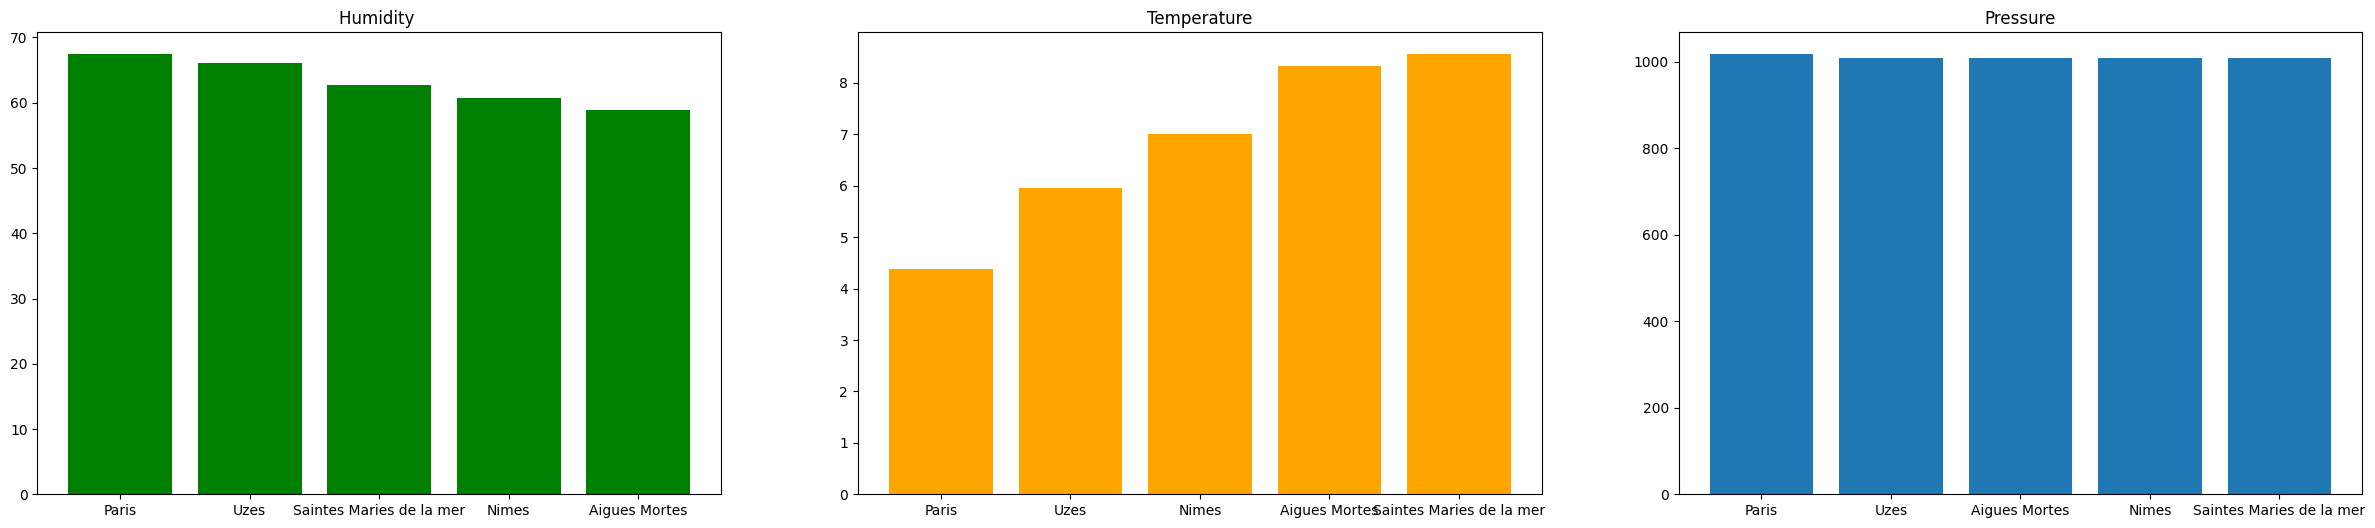

In [41]:
from matplotlib import pyplot as plt 

fig, axes = plt.subplots(1, 3, figsize=(30, 6))

sorted_humidity = best_5cities.sort_values(by='Humidity', ascending=False)['Humidity'] #lowest humidity rate we are searching for
sorted_temp = best_5cities.sort_values(by='Temperature', ascending=True)['Temperature'] # highest temperature we are searching for
sorted_pressure = best_5cities.sort_values(by='Pressure', ascending=False)['Pressure'] #lowest atm pressure searched

axes[0].bar(sorted_humidity.index, sorted_humidity, color='green')
axes[0].set_title('Humidity ')

axes[1].bar(sorted_temp.index, sorted_temp, color='orange')
axes[1].set_title('Temperature')

axes[2].bar(sorted_pressure.index, sorted_pressure)
axes[2].set_title('Pressure')

plt.show()

### Let's localise on a map best 5 cities we have selected 

In [42]:
import plotly.express as px 

In [47]:
fig = px.scatter_mapbox(best_5cities, 
                        lat = "Latitude", 
                        lon = "Longitude", 
                        color='Humidity',
                        size='Humidity',
                        mapbox_style='carto-positron',
                        opacity = 0.8, 
                        width=900, 
                        height=800, 
                        zoom=5,
                        title = 'Localising Best 5 Cities with lower Humidity Percentage')

fig.show()
fig.write_html("picture_map_best_cities5.html")

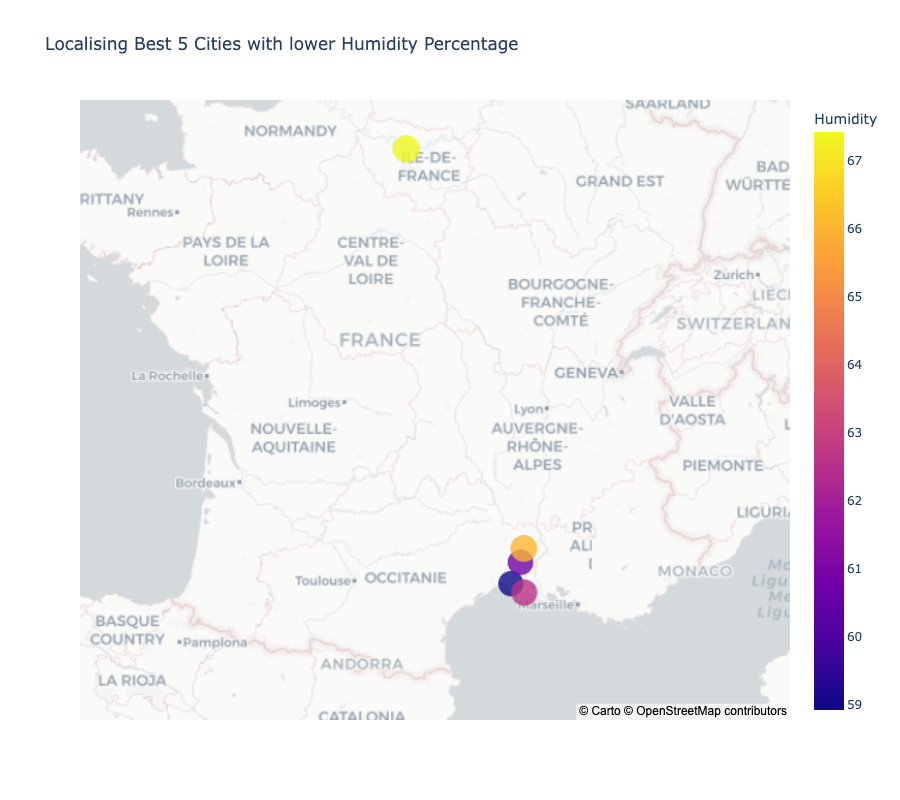

In [4]:
from IPython.display import Image
Image(filename="Graphs/plotly_best_cities_map.png")